# Capstone Project-5 (Hand_Written_Digits) - 25.03.2023_Solved

Data reference link : https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

# Exploratory Data Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError, ROCAUC

import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 100

## Load Dataset

In [2]:
df = pd.read_csv("pendigits_txt.csv")
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


## Explore Data

In [3]:
#
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (10992, 17)
___________________________
Data Types:
int64    17
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
class,int64,10992,10,0,0,9
input1,int64,10992,101,0,0,100
input10,int64,10992,101,0,0,100
input11,int64,10992,101,0,0,100
input12,int64,10992,101,0,0,100
input13,int64,10992,101,0,0,100
input14,int64,10992,101,0,0,100
input15,int64,10992,101,0,0,100
input16,int64,10992,101,0,0,100
input2,int64,10992,96,0,0,100


In [4]:
df.describe().T
# input2 de outlier
# 4. de outlier


,count,mean,std,min,25%,50%,75%,max
input1,10992.0,38.814320,34.257783,0.0,6.0,32.0,65.0,100.0
input2,10992.0,85.120269,16.218571,0.0,76.0,89.0,100.0,100.0
input3,10992.0,40.605622,26.342984,0.0,20.0,40.0,58.0,100.0
input4,10992.0,83.774199,19.163646,0.0,72.0,91.0,100.0,100.0
input5,10992.0,49.770378,34.100515,0.0,18.0,53.0,78.0,100.0
input6,10992.0,65.573144,26.996688,0.0,49.0,71.0,86.0,100.0
input7,10992.0,51.220251,30.576881,0.0,28.0,53.5,74.0,100.0
input8,10992.0,44.498999,29.906104,0.0,23.0,43.0,64.0,100.0
input9,10992.0,56.868541,34.135530,0.0,29.0,60.0,89.0,100.0
input10,10992.0,33.695961,27.251548,0.0,7.0,33.0,54.0,100.0


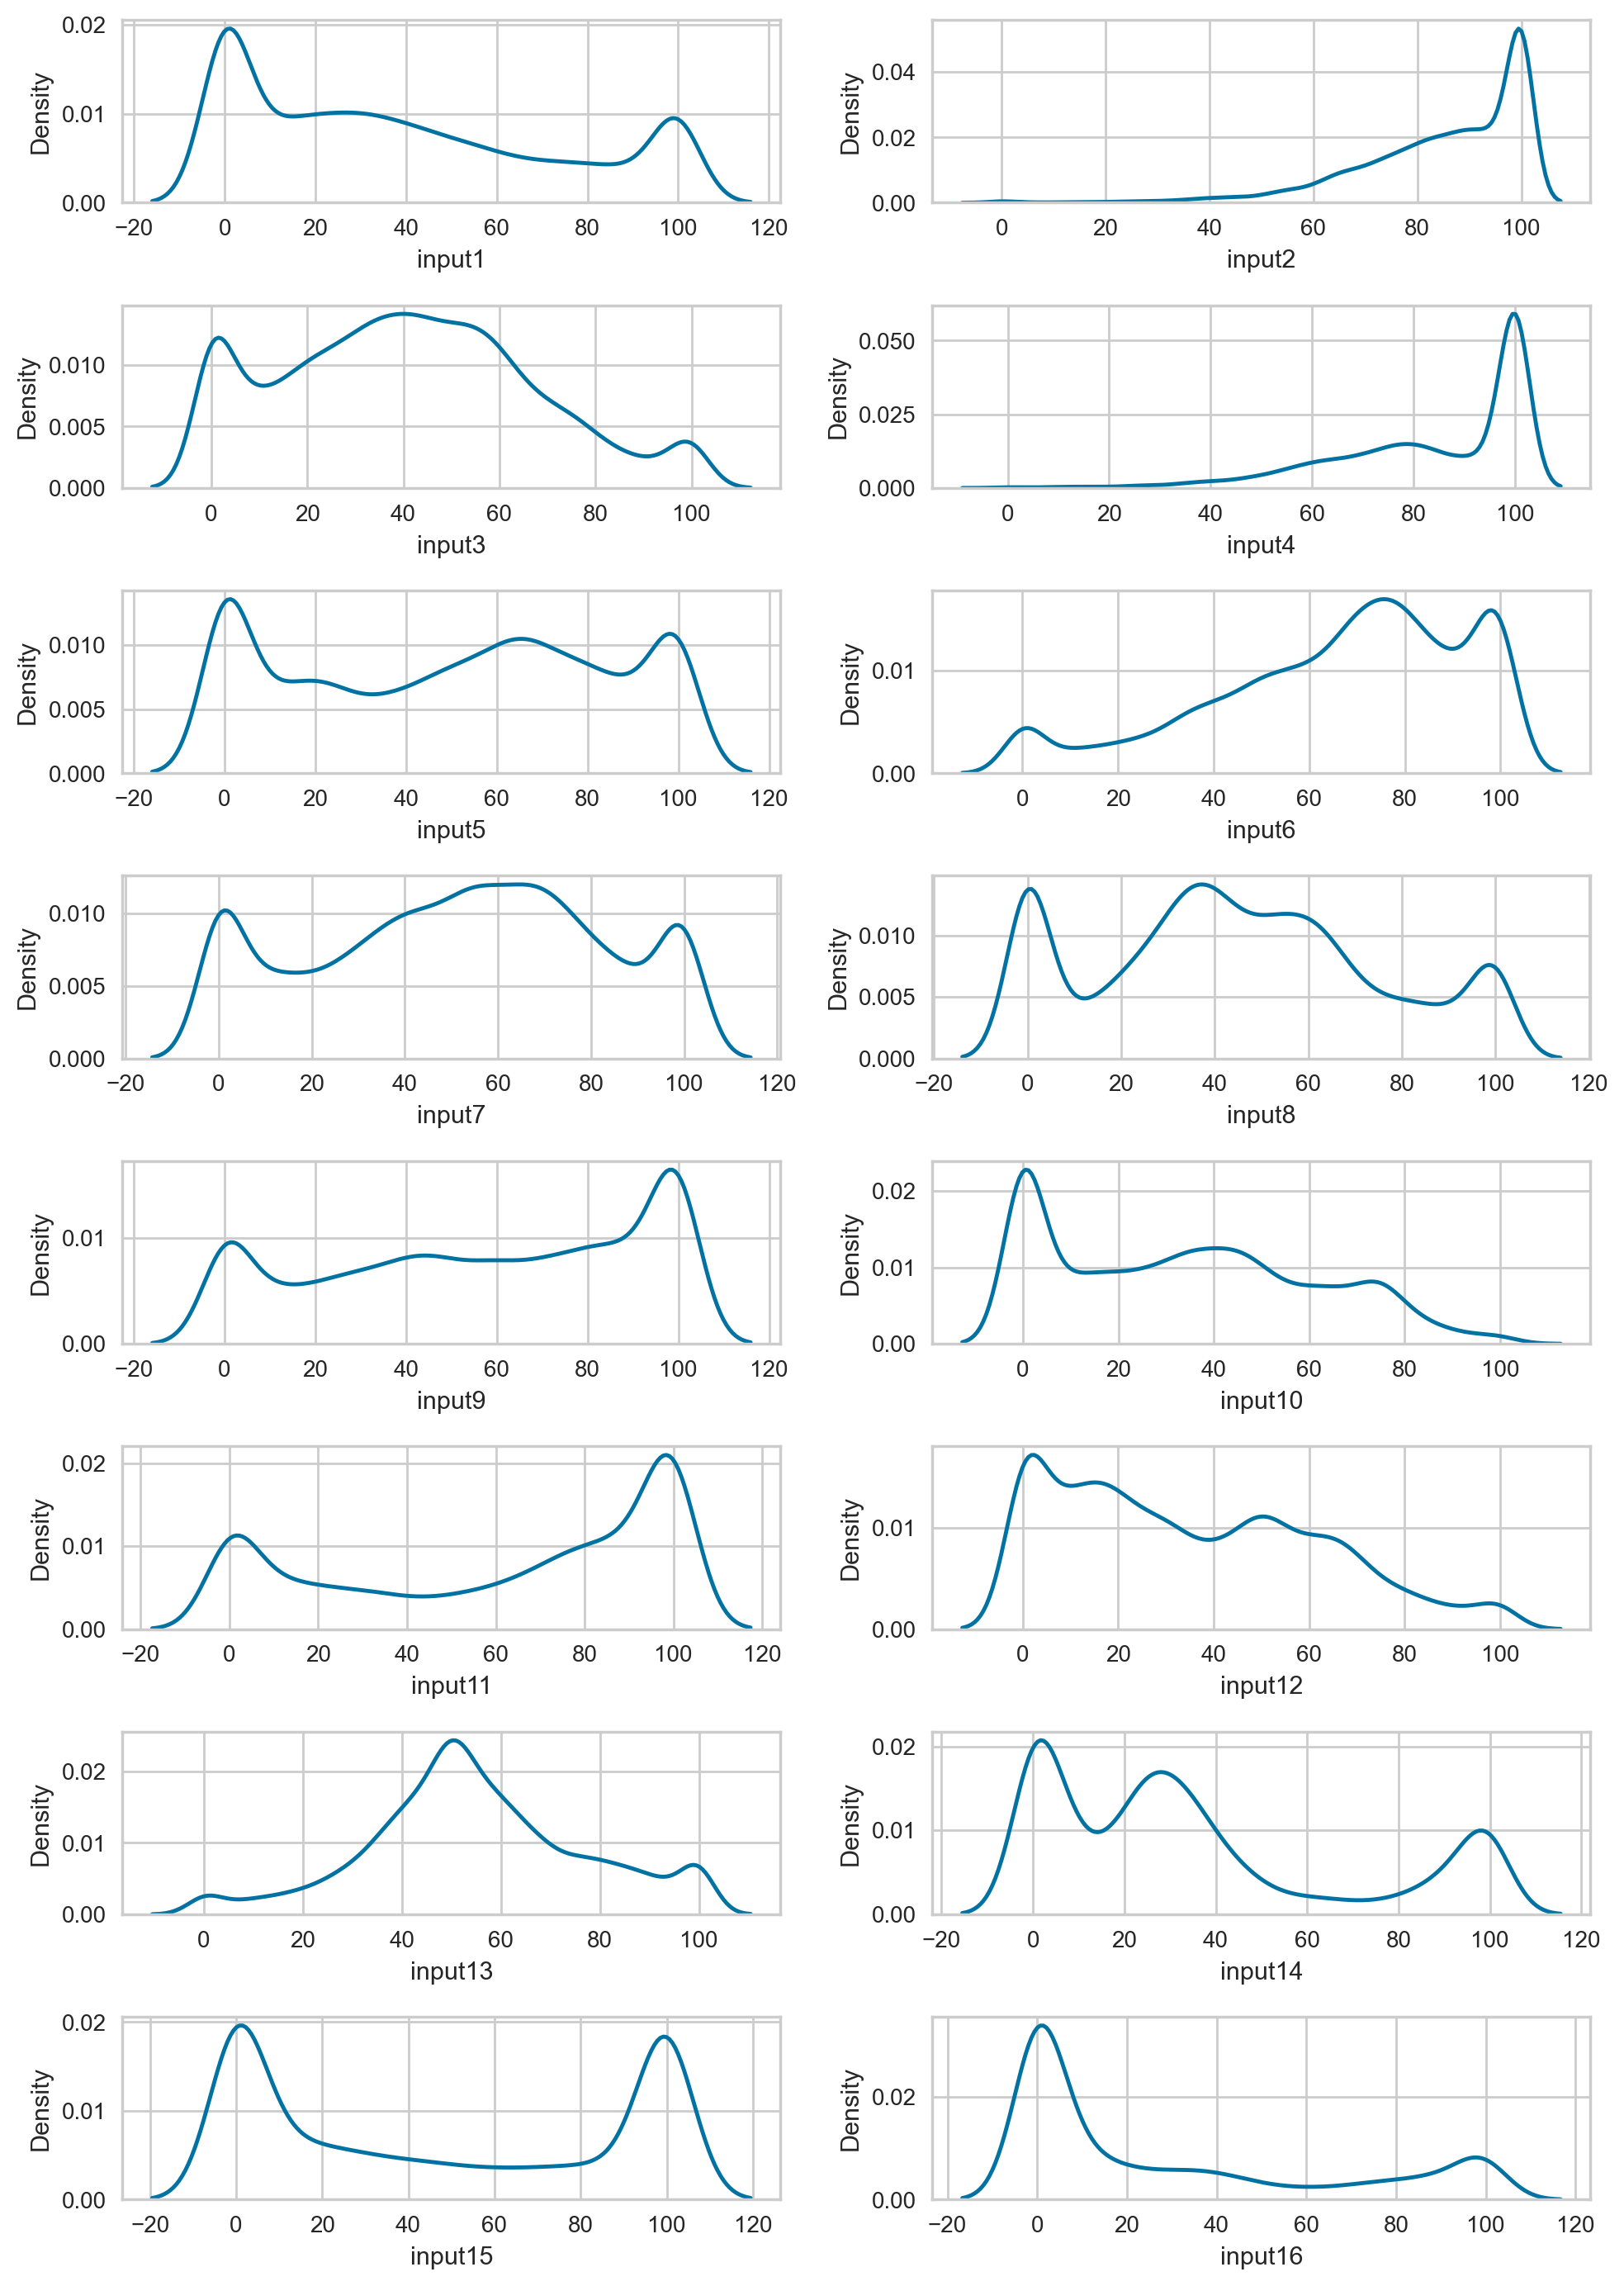

In [5]:
fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.kdeplot(df[col])
plt.tight_layout();
#dağılımlarına  baktık  sağa mı   solamı    çarpık

## 2.  Data Cleaning

### Detect Missing Values and Outliers

In [6]:
df.isnull().sum().any()# missing value varmı yok mu

False

<AxesSubplot:>

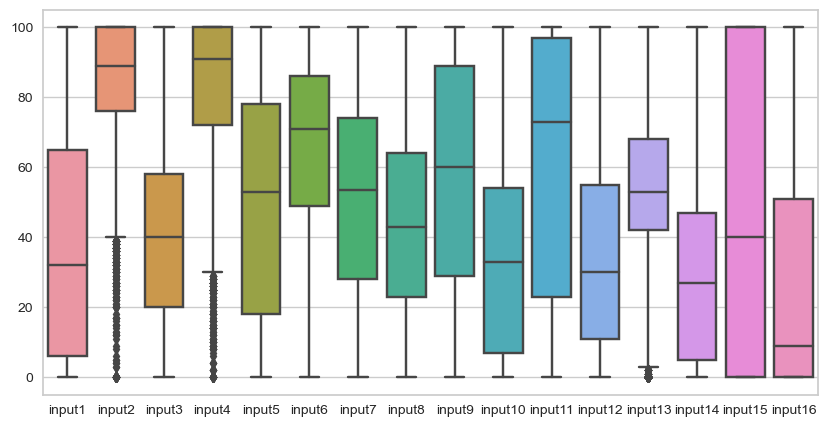

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df.drop("class", axis=1))
#outlier  değerlere  bakalım 
#SVM  ve  RT içinde  outlier   sıkıntılı olabiliyor

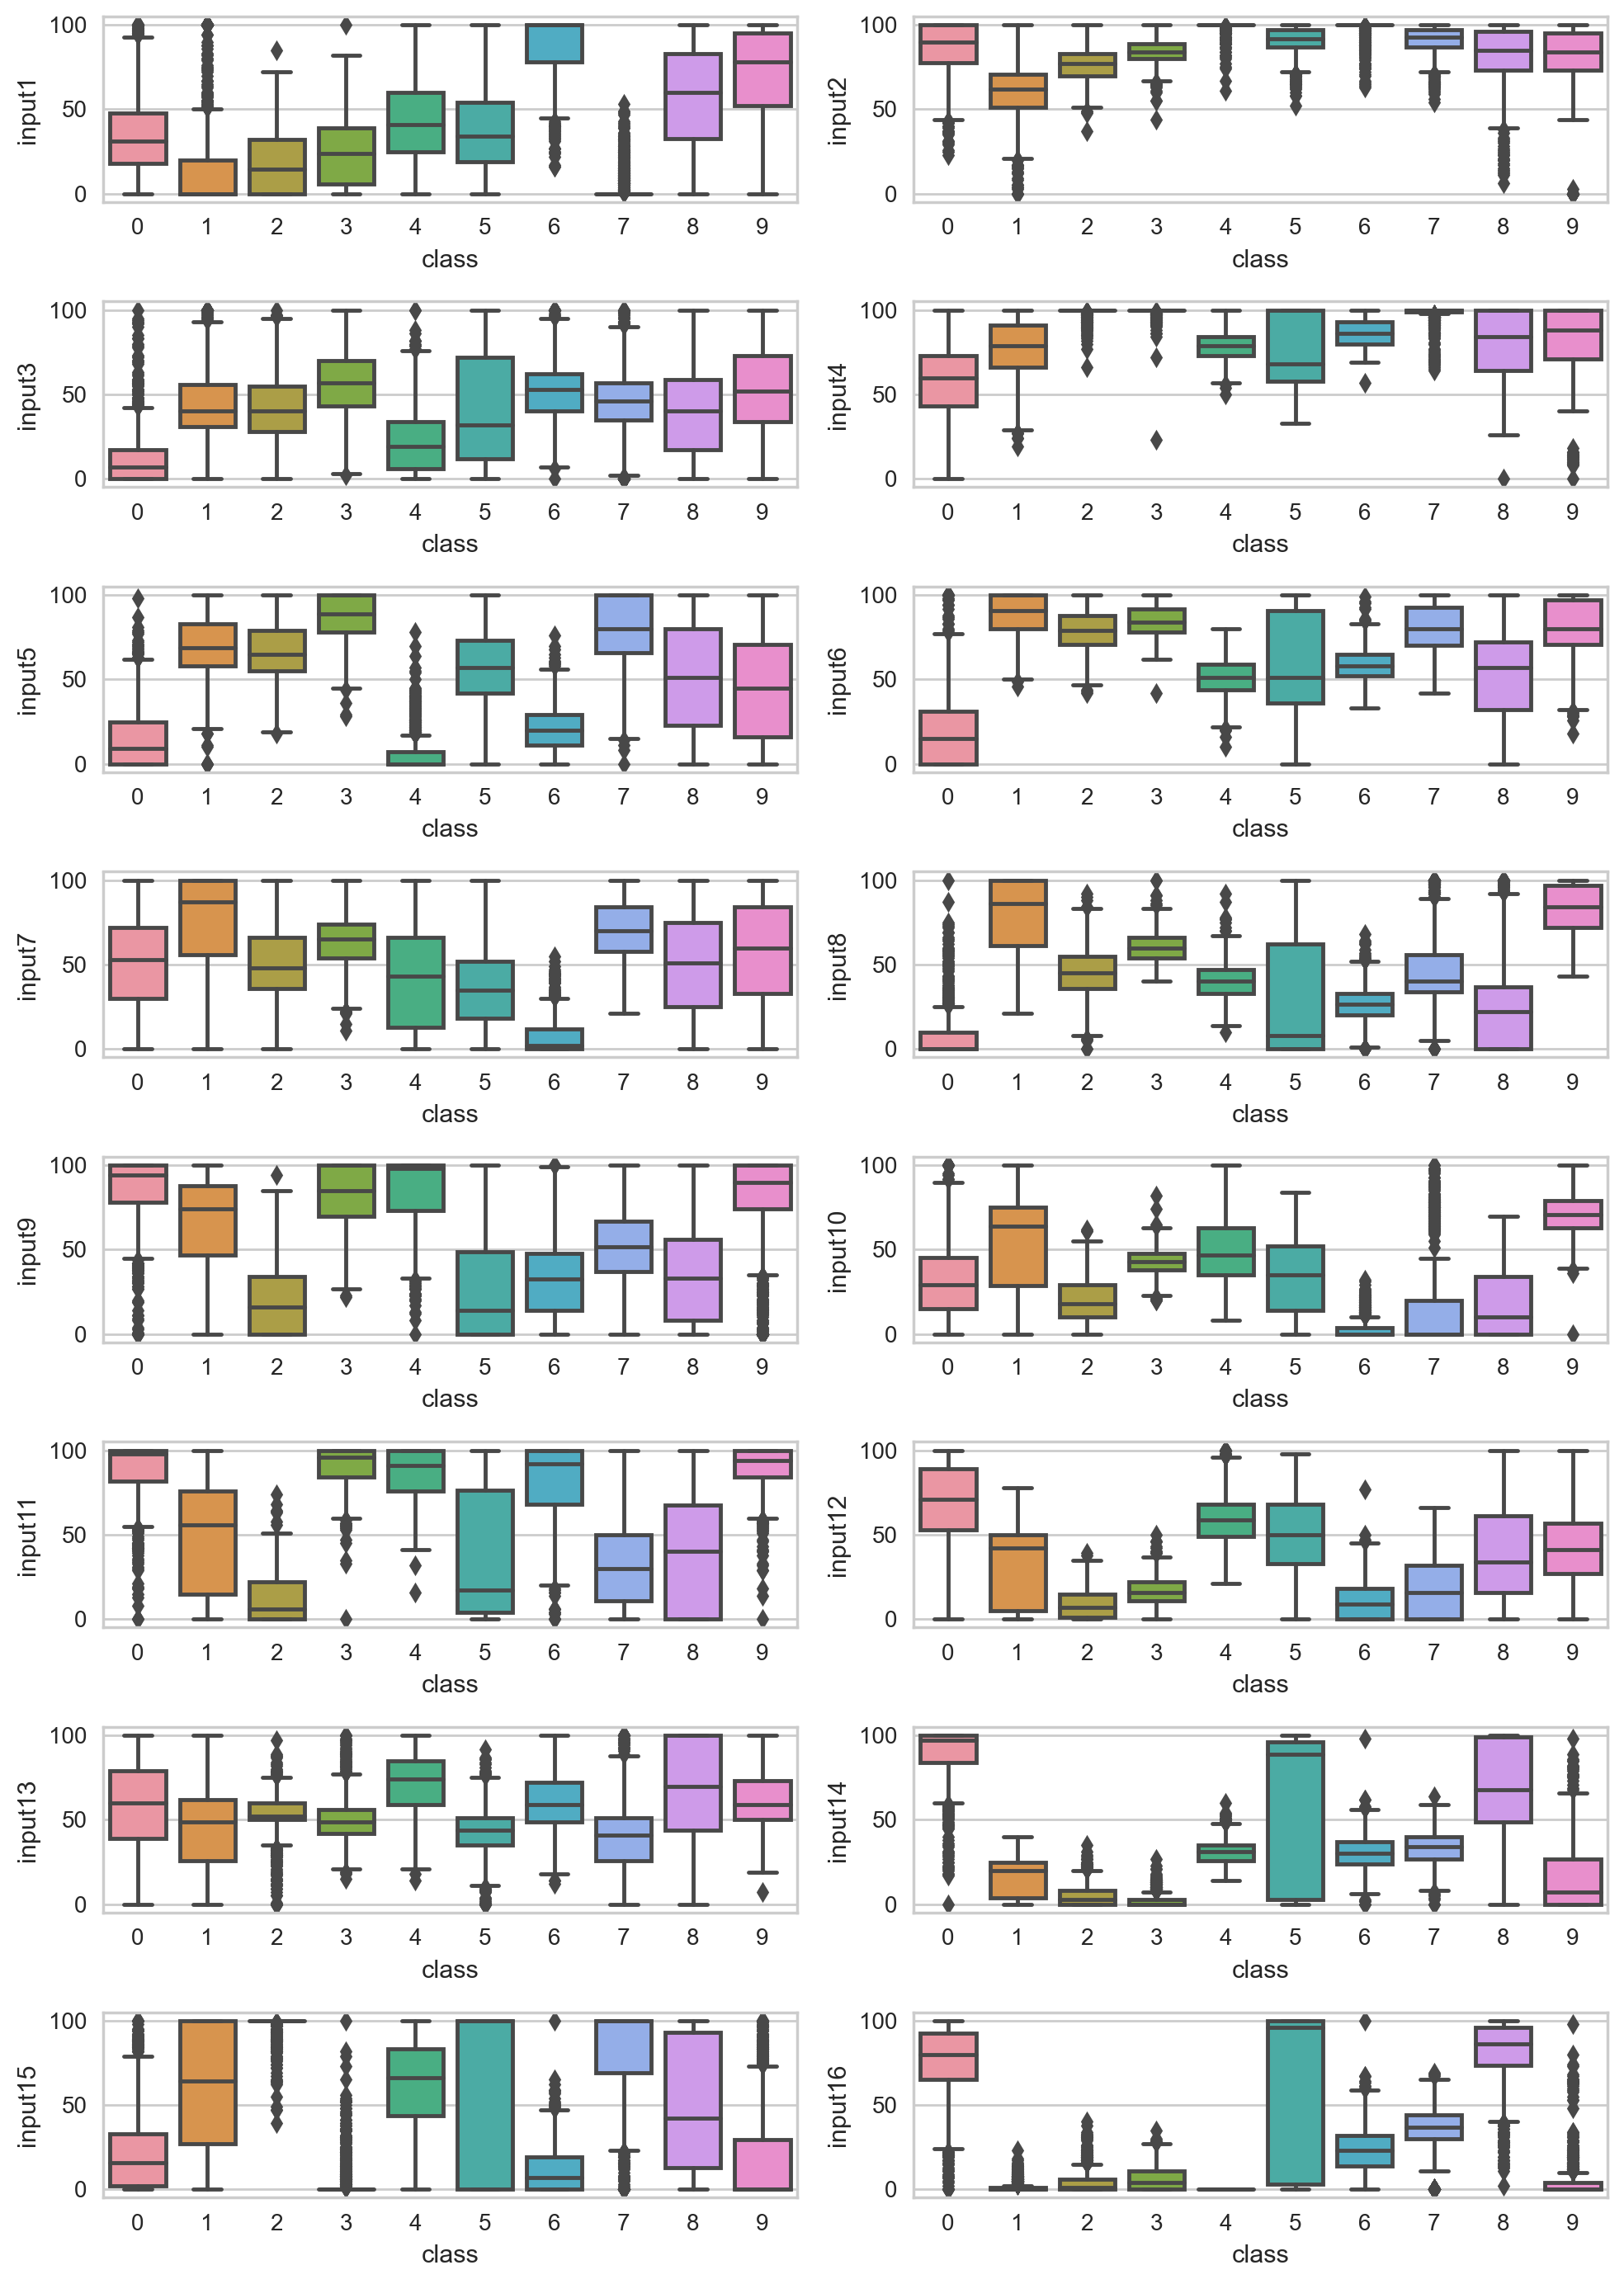

In [8]:
#tüm sutunşarı  clas bazında  outlier   var mı  baktık
fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.boxplot(y= df[col], x = df["class"], data=df)
plt.tight_layout();

In [9]:
#sayısını   bulmak için fonksiyon tanımladık
#hersınıf için outlier  görmek için
def detect_outliers(df, col_name,tukey=1.5): # tukey :1.5  eşik değer, 2 olursa  outlier daha daha az çıkar, tespit etmek için kullanılır IQR 
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(tukey*IQR)
    lower_limit = first_quartile-(tukey*IQR)
    outlier_count = 0 # sayaç 
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [10]:
threshold = 1.5
out_cols = []
for col in df.columns:
    print(
        f"{col}\nlower:{detect_outliers(df, col,threshold)[0]} \nupper:{detect_outliers(df, col,threshold)[1]}\
        \noutlier:{detect_outliers(df, col,threshold)[2]}\n*-*-*-*-*-*-*"
    )
    if detect_outliers(df, col,threshold)[2] > 0 :
        out_cols.append(col)
print(out_cols)        

input1
lower:-82.5 
upper:153.5        
outlier:0
*-*-*-*-*-*-*
input2
lower:40.0 
upper:136.0        
outlier:196
*-*-*-*-*-*-*
input3
lower:-37.0 
upper:115.0        
outlier:0
*-*-*-*-*-*-*
input4
lower:30.0 
upper:142.0        
outlier:153
*-*-*-*-*-*-*
input5
lower:-72.0 
upper:168.0        
outlier:0
*-*-*-*-*-*-*
input6
lower:-6.5 
upper:141.5        
outlier:0
*-*-*-*-*-*-*
input7
lower:-41.0 
upper:143.0        
outlier:0
*-*-*-*-*-*-*
input8
lower:-38.5 
upper:125.5        
outlier:0
*-*-*-*-*-*-*
input9
lower:-61.0 
upper:179.0        
outlier:0
*-*-*-*-*-*-*
input10
lower:-63.5 
upper:124.5        
outlier:0
*-*-*-*-*-*-*
input11
lower:-88.0 
upper:208.0        
outlier:0
*-*-*-*-*-*-*
input12
lower:-55.0 
upper:121.0        
outlier:0
*-*-*-*-*-*-*
input13
lower:3.0 
upper:107.0        
outlier:208
*-*-*-*-*-*-*
input14
lower:-58.0 
upper:110.0        
outlier:0
*-*-*-*-*-*-*
input15
lower:-150.0 
upper:250.0        
outlier:0
*-*-*-*-*-*-*
input16
lower:-76.5 
upper:127.5

In [ ]:
# bundan sonra  karar veriyoruz  düşürüp düşürme

In [11]:
out_cols

['input2', 'input4', 'input13']

In [12]:
df1 = df.copy() # data  kopyasıını alıp  outlier  düşürüp bakcaz düşürmeyip bakmak için

In [13]:
for col in out_cols:
    df1 = df1[(df1[col] > detect_outliers(df1, col)[0])
             & (df1[col] < detect_outliers(df1, col)[1])]

In [14]:
df1.shape

(10450, 17)

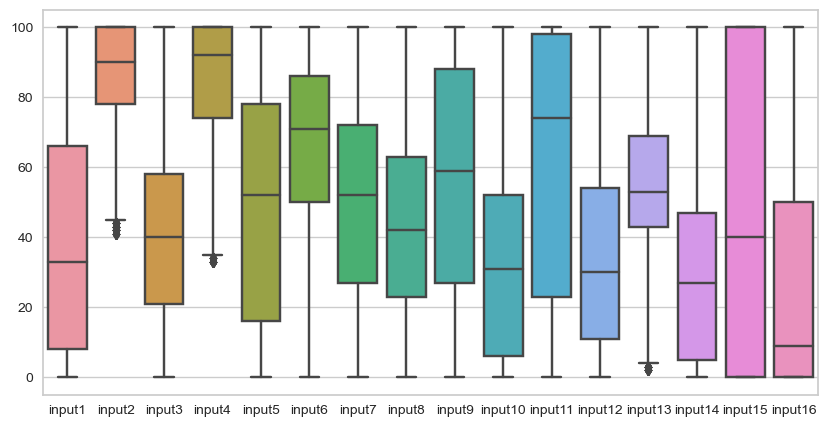

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df1.drop("class", axis=1));

In [16]:
len(df) - len(df1) # toplam outlier  sayısına    baktık, eda yı uzun tutmak herzaman iyidir, çünkü  modeli eğitmede

542

### My target column is `class`. So let's take a close look at this column.

In [17]:
for i in range(0,10) :
    print(f"the number of {i}--->{df[df['class'] == i].shape[0]}") 

the number of 0--->1143
the number of 1--->1143
the number of 2--->1144
the number of 3--->1055
the number of 4--->1144
the number of 5--->1055
the number of 6--->1056
the number of 7--->1142
the number of 8--->1055
the number of 9--->1055


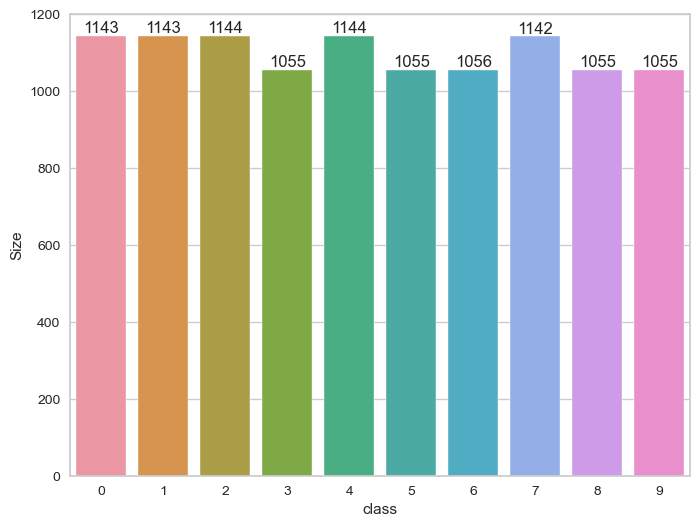

In [18]:
# burda  data balance mı değilmi
class_digit = df.groupby('class').size()
class_label = pd.DataFrame(class_digit,columns = ['Size'])
plt.figure(figsize = (8,6))
ax= sns.barplot(x = class_label.index, y = 'Size', data = class_label)
plt.bar_label(ax.containers[0]);

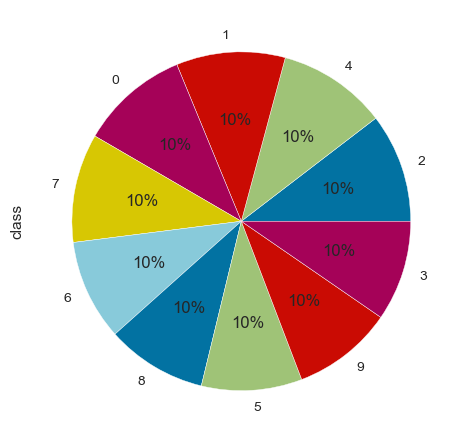

In [19]:
df["class"].value_counts().plot.pie(autopct='%1.0f%%');
# burda  data balance mı değilmi
#data balance  accuracy  ye bakılır
#unbalance da   f1 recall a bakılır

### Now, let's take a closer look at correlation of continuous columns.

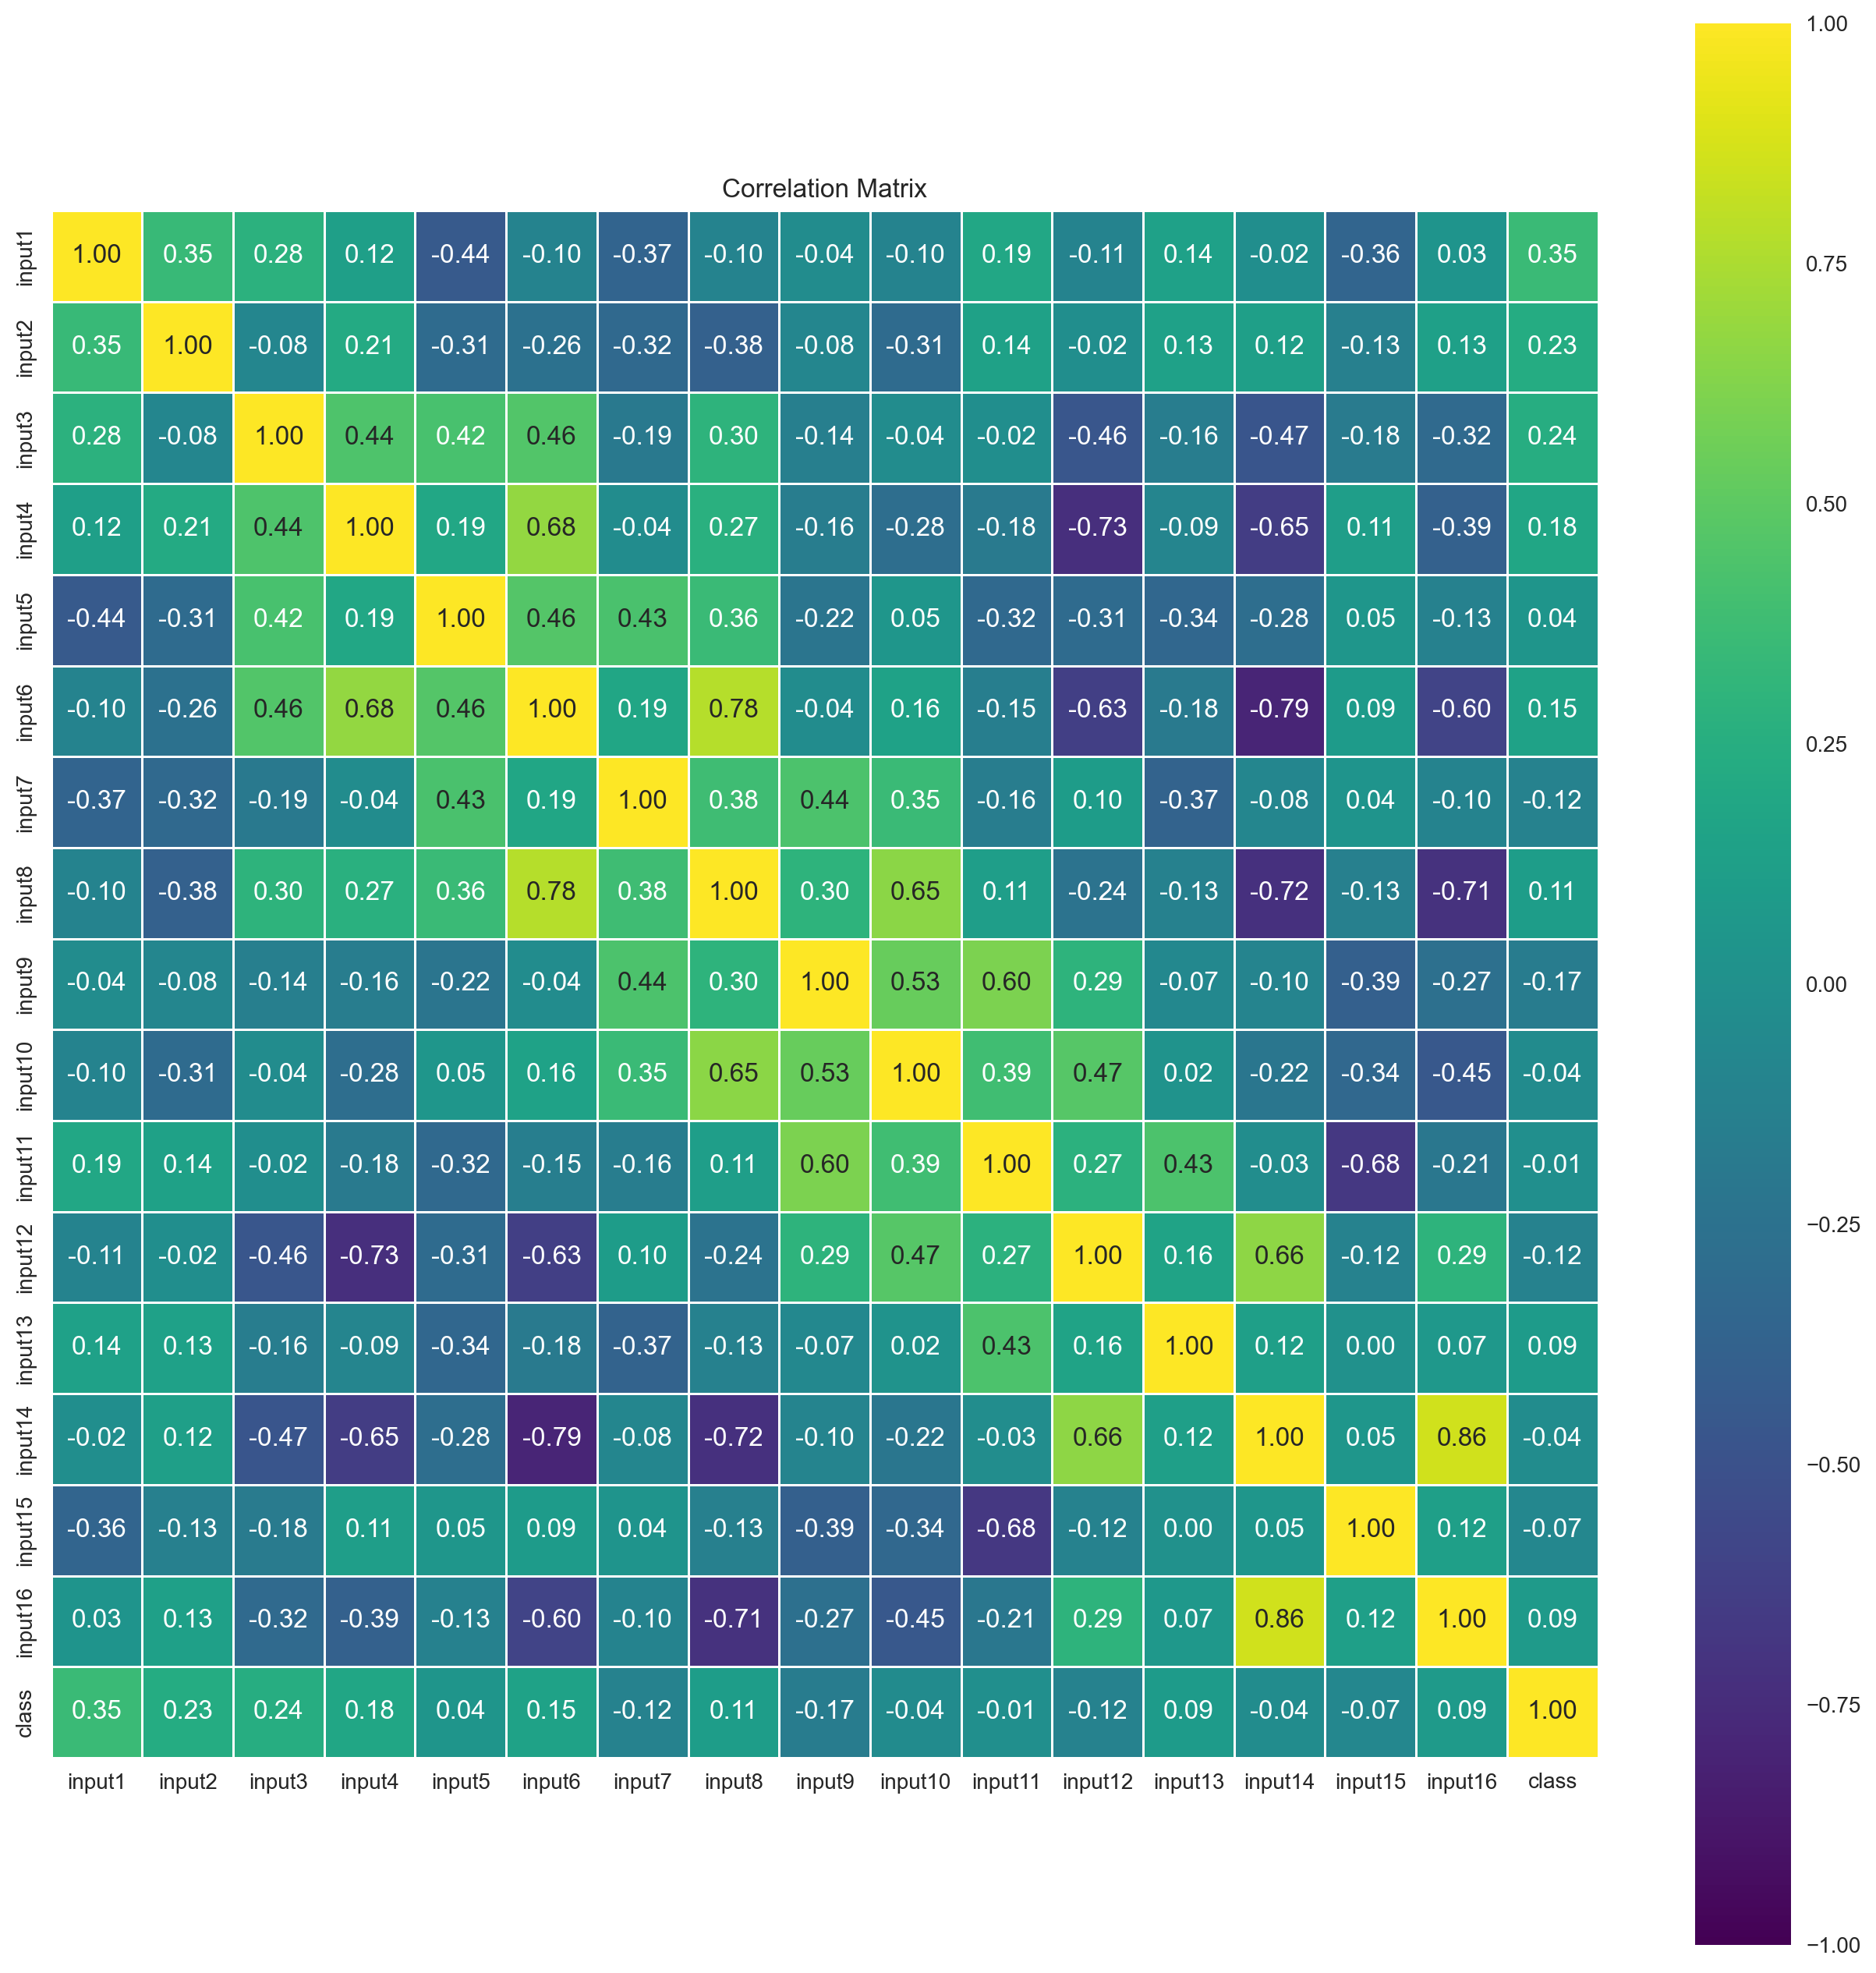

In [20]:
corr_matrix = df.corr()

plt.figure(figsize=(16, 16), dpi=200)
sns.heatmap(corr_matrix,square=True, annot=True, fmt=".2f", annot_kws={"size": 12}, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix")

plt.show();
#korelasyona baktık

In [21]:
df.to_csv("handdigit_EDA.csv", index = False)

# Multi-class Classification

### Data Preprocessing

In [22]:
df = pd.read_csv("handdigit_EDA.csv")

In [23]:
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [24]:
X = df.drop("class", axis = 1)
y = df["class"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

## Implement Support Vector Machine



https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167
    
https://medium.com/grabngoinfo/support-vector-machine-svm-hyperparameter-tuning-in-python-a65586289bcb

https://www.baeldung.com/cs/svm-multiclass-classification

https://www.analyticsvidhya.com/blog/2021/05/multiclass-classification-using-svm/

https://towardsdatascience.com/multiclass-classification-with-support-vector-machines-svm-kernel-trick-kernel-functions-f9d5377d6f02    

### Vanilla SVC

In [26]:
scaler = MinMaxScaler()  

In [27]:
modelSVM =  SVC(kernel="rbf")

In [28]:
from sklearn.pipeline  import Pipeline

modelSVM = Pipeline([("scaler",scaler),("SVM",modelSVM)])

In [29]:
modelSVM.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('SVM', SVC())])

In [30]:
y_pred_test = modelSVM.predict(X_test)
y_pred_train = modelSVM.predict(X_train)

In [31]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro') # multi class  datada  balance   ise  macro  bakılıyor

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

(0.9894468704512372,
 0.9959970887918487,
 0.9895711417284282,
 0.9959816991094597)

In [32]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))

print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))  # skorlar yakın diye  3 digit
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))


TEST CM
 [[270   0   0   0   0   0   0   0   2   0]
 [  0 283   7   0   1   0   0   1   0   0]
 [  0   1 293   0   0   0   0   0   0   0]
 [  0   0   0 277   0   0   0   0   0   1]
 [  0   0   0   0 288   2   0   0   0   0]
 [  0   0   0   3   0 263   0   0   0   1]
 [  0   0   0   0   0   0 264   0   0   0]
 [  0   2   2   0   0   0   0 265   0   0]
 [  0   0   0   0   0   1   0   0 255   0]
 [  0   1   0   0   0   0   0   3   1 261]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[869   1   0   0   0   0   1   0   0   0]
 [  0 841   4   5   0   0   0   1   0   0]
 [  0   3 846   0   0   0   0   1   0   0]
 [  0   1   2 771   0   1   0   1   0   1]
 [  0   0   0   0 851   2   0   1   0   0]
 [  0   0   0   2   0 783   0   0   1   2]
 [  0   0   0   0   0   1 791   0   0   0]
 [  0   0   0   0   0   0   0 873   0   0]
 [  0   0   0   0   0   0   0   1 798   0]
 [  0   1   0   0   0   0   0   0   0 788]]
TEST REPORT 
               precision    recall  f1-score

#### SVC GridsearchCV

In [33]:
param_grid = {'SVM__C':np.linspace(1, 1.3, 10),
              'SVM__gamma':["scale", "auto"]
             }

In [34]:
model = Pipeline([("scaler",scaler),("SVM", SVC(kernel="rbf"))]) 

svm_model_grid = GridSearchCV(model,# burada   cv  yazmadık  zaten içinde  none olarak   5  katlı yapar
                              param_grid,
                              verbose=2, # bilgimnin çıktı seviyesini baktık
                              scoring="accuracy",
                              n_jobs=-1)

svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVM', SVC())]),
             n_jobs=-1,
             param_grid={'SVM__C': array([1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
       1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ]),
                         'SVM__gamma': ['scale', 'auto']},
             scoring='accuracy', verbose=2)

In [35]:
svm_model_grid.best_params_

{'SVM__C': 1.1666666666666667, 'SVM__gamma': 'scale'}

In [36]:
svm_model_grid.best_estimator_  # default  olamayan değerleri  gösterir

Pipeline(steps=[('scaler', MinMaxScaler()), ('SVM', SVC(C=1.1666666666666667))])

In [37]:
y_pred_test = svm_model_grid.predict(X_test)
y_pred_train = svm_model_grid.predict(X_train)

In [38]:
SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

SVM_accuracy_test, SVM_accuracy_train, svm_f1_test, svm_f1_train

(0.9898107714701602,
 0.9964822901504125,
 0.9899493981509441,
 0.9964616881331348)

In [39]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))

print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[271   0   0   0   0   0   0   0   1   0]
 [  0 283   7   0   1   0   0   1   0   0]
 [  0   1 293   0   0   0   0   0   0   0]
 [  0   0   0 277   0   0   0   0   0   1]
 [  0   0   0   0 288   2   0   0   0   0]
 [  0   0   0   3   0 263   0   0   0   1]
 [  0   0   0   0   0   0 264   0   0   0]
 [  0   2   2   0   0   0   0 265   0   0]
 [  0   0   0   0   0   1   0   0 255   0]
 [  0   1   0   0   0   0   0   3   1 261]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[869   1   0   0   0   0   1   0   0   0]
 [  0 842   4   4   0   0   0   1   0   0]
 [  0   1 848   0   0   0   0   1   0   0]
 [  0   1   2 771   0   1   0   1   0   1]
 [  0   0   0   0 852   1   0   1   0   0]
 [  0   0   0   2   0 783   0   0   1   2]
 [  0   0   0   0   0   1 791   0   0   0]
 [  0   0   0   0   0   0   0 873   0   0]
 [  0   0   0   0   0   0   0   1 798   0]
 [  0   1   0   0   0   0   0   0   0 788]]
TEST REPORT 
               precision    recall  f1-score

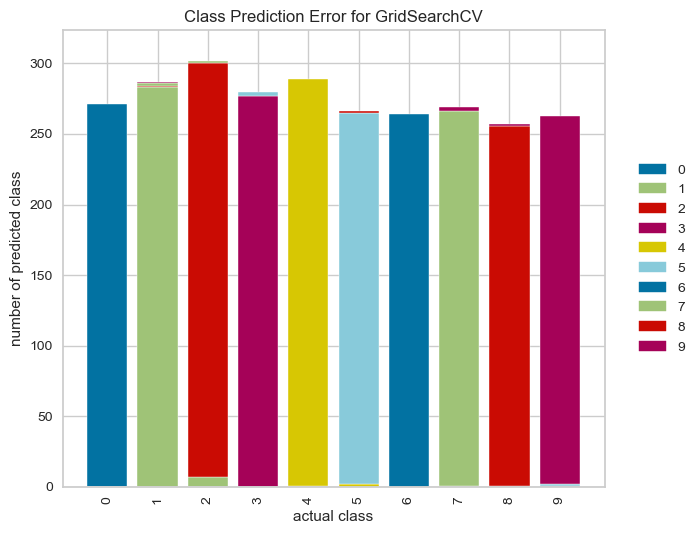

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [40]:
visualizer = ClassPredictionError(svm_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()
# tahmin  hatalarımızı tek  tek  baktık hangi değerllerle   karıştırmış

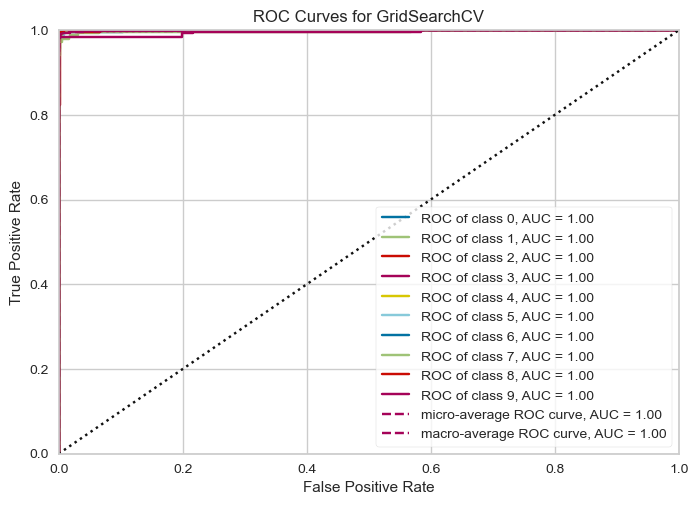

In [41]:
visualizer = ROCAUC(svm_model_grid, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                      # Finalize and render the figure

## Implement Random Forest Classifier


### Vanilla RF

In [42]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

In [44]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.9836244541484717, 1.0, 0.9839315904159219, 1.0)

In [45]:
print("TEST REPORT")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test, digits = 3))


print("\n"*3, "-*"*30)
print("TRAIN REPORT")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train, digits = 3))

TEST REPORT
[[266   0   0   0   0   0   0   0   6   0]
 [  0 273  17   0   1   0   0   1   0   0]
 [  0   3 291   0   0   0   0   0   0   0]
 [  0   0   0 278   0   0   0   0   0   0]
 [  0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   3   0 262   0   0   0   2]
 [  0   0   0   0   0   0 264   0   0   0]
 [  0   4   1   0   0   0   0 264   0   0]
 [  1   0   0   0   0   1   0   0 254   0]
 [  0   1   0   1   0   0   0   2   1 261]]
              precision    recall  f1-score   support

           0      0.996     0.978     0.987       272
           1      0.972     0.935     0.953       292
           2      0.942     0.990     0.965       294
           3      0.986     1.000     0.993       278
           4      0.997     1.000     0.998       290
           5      0.996     0.981     0.989       267
           6      1.000     1.000     1.000       264
           7      0.989     0.981     0.985       269
           8      0.973     0.992     0.983       256
           9    

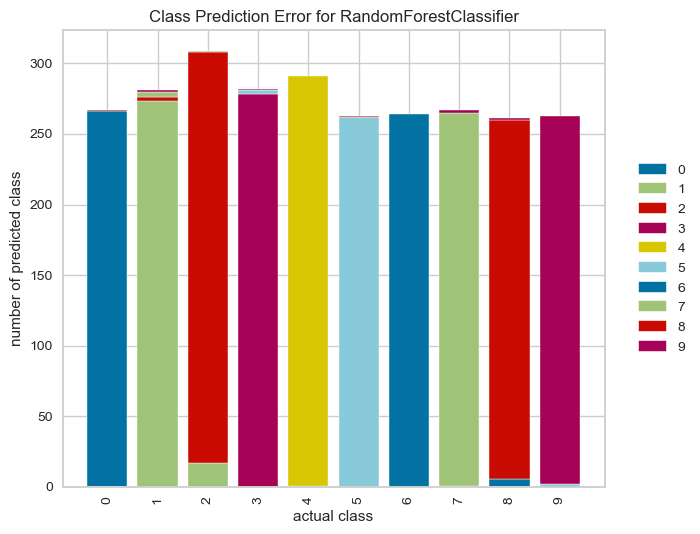

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [46]:
visualizer = ClassPredictionError(rfc)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

### RF GridsearchCV

In [47]:
param_grid = {
             'criterion': ["entropy","gini"],
             'max_depth':[7,8],
             'max_features':['auto', 0.8],
             'max_leaf_nodes': [180,200],
             'n_estimators':[50,100],
             }

In [48]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [7, 8],
                         'max_features': ['auto', 0.8],
                         'max_leaf_nodes': [180, 200],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [49]:
rf_grid_model.best_params_  # 

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 0.8,
 'max_leaf_nodes': 180,
 'n_estimators': 100}

In [50]:
y_pred_test = rf_grid_model.predict(X_test)
y_pred_train = rf_grid_model.predict(X_train)

In [51]:
rfc_accuracy_test = accuracy_score(y_test, y_pred_test)
rfc_accuracy_train = accuracy_score(y_train, y_pred_train)

rfc_f1_test = f1_score(y_test, y_pred_test, average='macro')
rfc_f1_train = f1_score(y_train, y_pred_train, average='macro')

rfc_accuracy_test, rfc_accuracy_train, rfc_f1_test, rfc_f1_train

(0.9774381368267832,
 0.9934497816593887,
 0.9777642376333437,
 0.9934347966870132)

In [52]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train, digits= 3))

TEST CM
 [[270   0   0   0   0   0   0   0   2   0]
 [  0 273  17   0   1   0   0   1   0   0]
 [  0   3 288   1   0   0   0   2   0   0]
 [  0   2   0 275   0   1   0   0   0   0]
 [  0   0   0   0 290   0   0   0   0   0]
 [  0   0   0   6   0 254   0   0   1   6]
 [  0   1   0   0   0   0 263   0   0   0]
 [  0   5   1   3   0   0   0 259   1   0]
 [  2   0   0   0   0   0   0   0 254   0]
 [  0   1   0   2   0   0   0   2   1 260]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[871   0   0   0   0   0   0   0   0   0]
 [  0 823  14  14   0   0   0   0   0   0]
 [  0   1 847   1   0   0   0   1   0   0]
 [  0   3   2 769   0   1   0   2   0   0]
 [  0   0   0   0 853   0   0   0   0   1]
 [  0   0   0   2   0 785   0   0   0   1]
 [  0   0   0   0   1   0 791   0   0   0]
 [  0   1   1   2   0   0   0 869   0   0]
 [  0   0   0   0   0   0   0   0 799   0]
 [  0   2   0   2   1   1   0   0   0 783]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

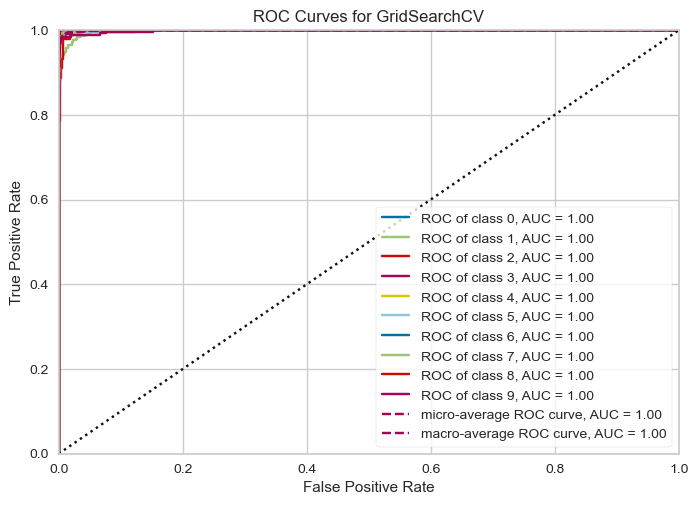

<AxesSubplot:title={'center':'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [53]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rf_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and render the figure

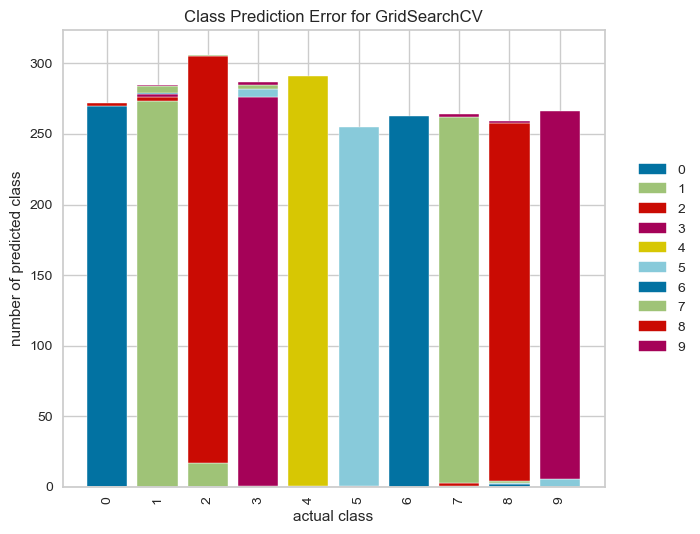

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [54]:
visualizer = ClassPredictionError(rf_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

# Compare The Models

## Accuracy Comparison

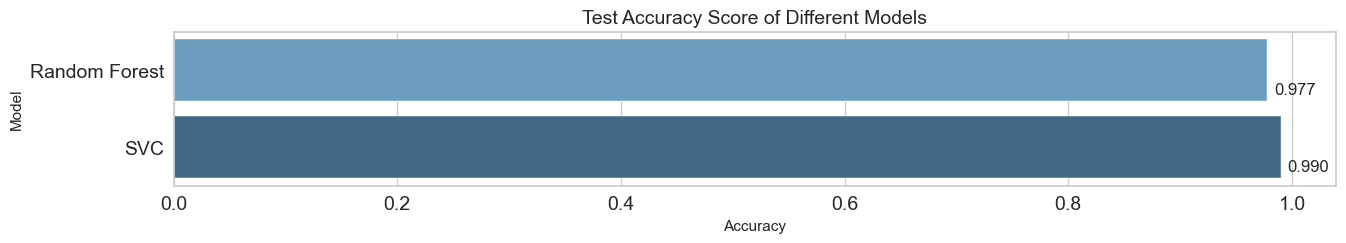

In [55]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest"],
                        "Accuracy": [SVM_accuracy_test, rfc_accuracy_test]})

compare = compare.sort_values(by="Accuracy", ascending=True)

plt.figure(figsize=(15,2))
ax = sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.9),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test Accuracy Score of Different Models", size=14);

## F1 Score Comparison

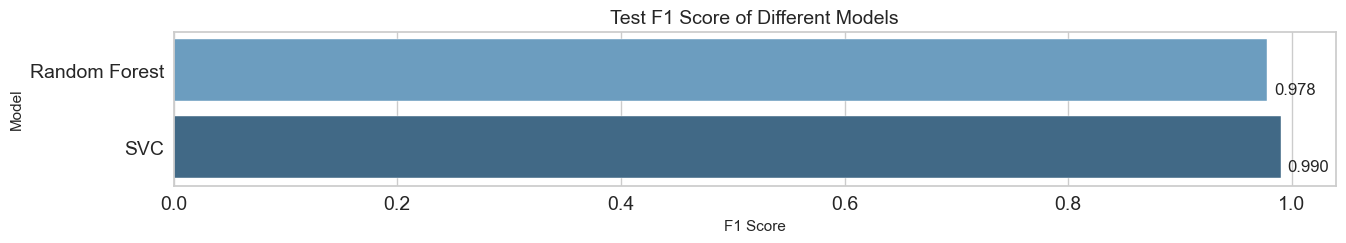

In [56]:
compare = pd.DataFrame({"Model": ["SVC", "Random Forest"],
                        "F1 Score": [svm_f1_test, rfc_f1_test]})

compare = compare.sort_values(by="F1 Score", ascending=True)

plt.figure(figsize=(15,2))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + .9),
                xytext=(5, 10), textcoords='offset points')

plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Test F1 Score of Different Models", size=14);

# Conclusion